# **Tianic Kaggle Project**

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [0]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [0]:
# machine learning
from  sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC, LinearSVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as skmetrics
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV

In [0]:
train_df = pd.read_csv('../content/train.csv')

In [0]:
test_df = pd.read_csv('../content/test.csv')

combine is a list of the train and test datasets. Will be used to perform operations at both datasets at once.


In [0]:
combine = [train_df, test_df]

In [186]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [187]:
len(train_df[train_df.Age.isnull()])

177

we got 38% survival rate in the train dataset:

In [188]:
len(train_df[train_df.Survived == 1]) / len(train_df)

0.3838383838383838

In [189]:
train_df.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moutal, Mr. Rahamin Haim",male,CA. 2343,G6,S
freq,1,577,7,4,644


How a sample looks like:

In [190]:
train_df[train_df.Ticket == '1601'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


In [192]:
len(train_df[train_df.Cabin.isnull()]) / len(train_df)

0.7710437710437711

In [193]:
len(test_df[test_df.Cabin.isnull()]) / len(test_df)

0.7822966507177034

In [194]:
len(train_df[train_df.Cabin.isnull()==False])

204

from class 1 how many were survived

In [195]:
len(train_df[(train_df.Pclass==1) & (train_df.Survived==1)]) / len(train_df[(train_df.Pclass==1)])

0.6296296296296297

In [196]:
len(train_df[(train_df.Sex=='female') & (train_df.Survived==1)]) / len(train_df[(train_df.Sex=='female')])
                                                                     

0.7420382165605095

In [0]:
dos =train_df[["SibSp","Survived"]]

In [0]:
sur = dos.groupby('SibSp').agg({"Survived": ['sum','count','mean']})

In [200]:
sur

Survived                
           sum count      mean
SibSp                         
0          210   608  0.345395
1          112   209  0.535885
2           13    28  0.464286
3            4    16  0.250000
4            3    18  0.166667
5            0     5  0.000000
8            0     7  0.000000

In [201]:
sur.columns

MultiIndex(levels=[['Survived'], ['sum', 'count', 'mean']],
           codes=[[0, 0, 0], [0, 1, 2]])

In [202]:
sur.iloc[0:2,2:3]


,Survived
,mean
SibSp,
0,0.345395
1,0.535885


In [203]:
for col in sur.columns: 
    print(col) 

('Survived', 'sum')
('Survived', 'count')
('Survived', 'mean')


In [204]:
 [col for col in sur.columns]

[('Survived', 'sum'), ('Survived', 'count'), ('Survived', 'mean')]

In [0]:
plotit = sur[('Survived', 'mean')]

In [206]:
plotit.index

Int64Index([0, 1, 2, 3, 4, 5, 8], dtype='int64', name='SibSp')

In [207]:
type(plotit)

pandas.core.series.Series

Survival ratio per Class:

<BarContainer object of 7 artists>

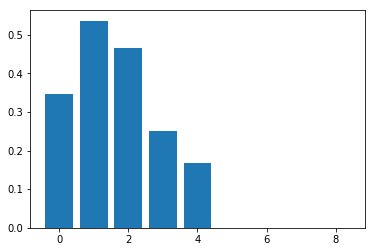

In [208]:
plt.bar(plotit.index, plotit.values, label="bar")

In [209]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
pclass_df=train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

In [211]:
pclass_df

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [212]:
pclass_df['Survived'].values

array([0.62962963, 0.47282609, 0.24236253])

<BarContainer object of 3 artists>

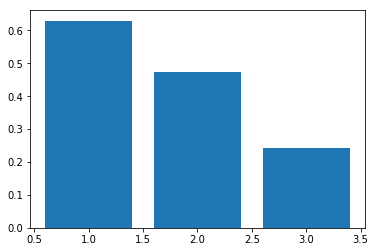

In [213]:
plt.bar(pclass_df['Pclass'].values, pclass_df['Survived'].values, label="bar")

<BarContainer object of 3 artists>

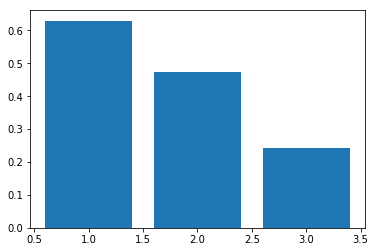

In [214]:
plt.bar(pclass_df['Pclass'].values, pclass_df['Survived'].values, label="bar")

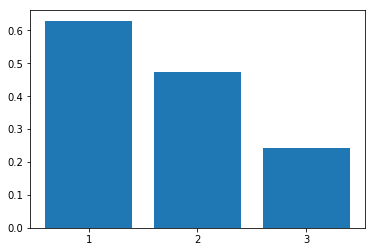

In [215]:
plt.bar(pclass_df['Pclass'].values, pclass_df['Survived'].values,align='center')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [0]:
Sex_df=train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

In [217]:
Sex_df

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
pclass_df=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

In [219]:
pclass_df

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


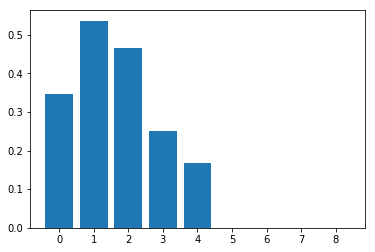

In [220]:
plt.bar(pclass_df['SibSp'].values, pclass_df['Survived'].values,align='center')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [0]:
dos =train_df[["SibSp","Survived"]]

In [0]:
sur = train_df[["SibSp","Survived"]].groupby('SibSp').agg({"Survived": ['sum','count','mean']})

In [223]:
sur

Survived                
           sum count      mean
SibSp                         
0          210   608  0.345395
1          112   209  0.535885
2           13    28  0.464286
3            4    16  0.250000
4            3    18  0.166667
5            0     5  0.000000
8            0     7  0.000000

In [224]:
sur[('Survived', 'mean')]

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: (Survived, mean), dtype: float64

In [0]:
pclass_df=train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

In [226]:
pclass_df

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


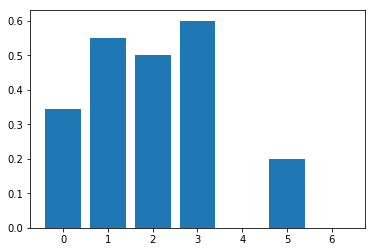

In [227]:
plt.bar(pclass_df['Parch'].values, pclass_df['Survived'].values,align='center')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

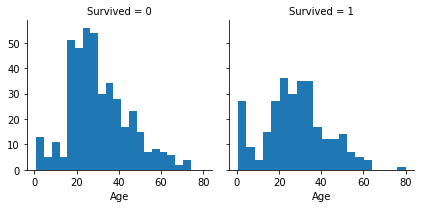

In [228]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

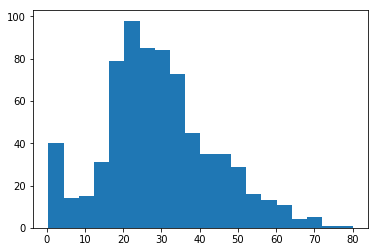

In [229]:
plt.hist(train_df['Age'],bins=20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([27.,  9.,  4., 15., 27., 36., 30., 35., 35., 17., 12., 12., 14.,
         7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

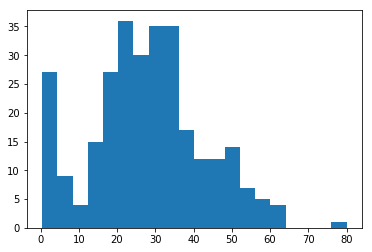

In [230]:
plt.hist(train_df[train_df['Survived']==1]['Age'],bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


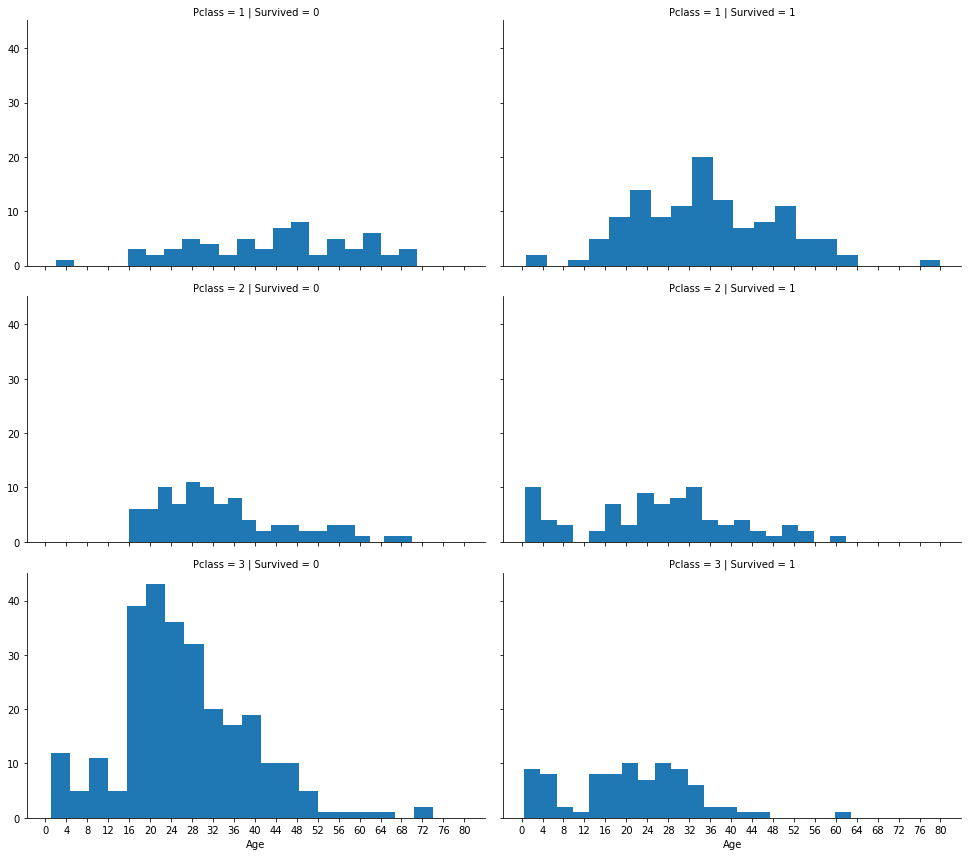

In [231]:
grid = sns.FacetGrid(data=train_df, col='Survived', row='Pclass', size=4, aspect=1.7)
plt.xticks(np.arange(0, 81, step=4))
grid.map(plt.hist, 'Age', alpha=1, bins=20)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


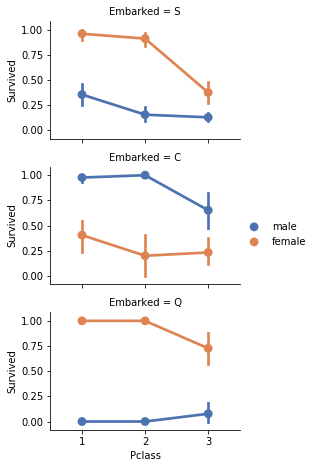

In [232]:
grid = sns.FacetGrid(train_df, row = 'Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

(train_df.Embarked=='C') & (train_df.Sex=='male')

In [233]:
train_df[(train_df.Embarked=='S') & (train_df.Sex=='female') & (train_df.Pclass==1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S


In [0]:
gr= train_df.groupby('Embarked')

In [235]:
gr['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


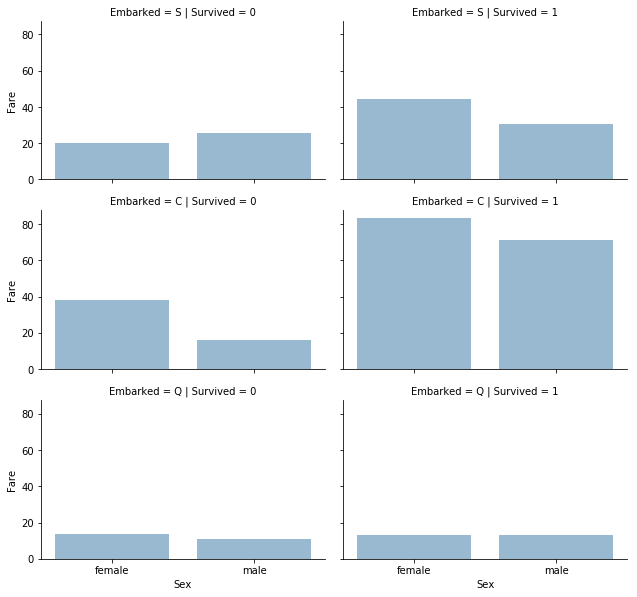

In [236]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.8, aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',ci=None, alpha=.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


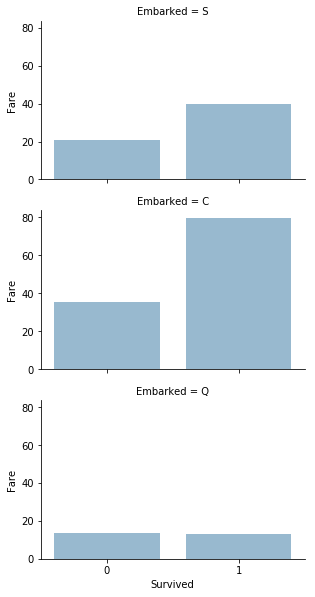

In [237]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.8, aspect=1.6)
grid.map(sns.barplot,'Survived','Fare',ci=None, alpha=.5 )

In [238]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [0]:
train_df=train_df.drop(['Ticket','Cabin'], axis=1)

In [0]:
test_df = test_df.drop(['Ticket','Cabin'], axis=1) 

In [0]:
combine = [train_df, test_df]

In [242]:
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [0]:
for dataset in combine:
  dataset['Title']= dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [0]:
check=pd.Series(('guy','Yoav'),(1,2))

In [245]:
check

1     guy
2    Yoav
dtype: object

In [0]:
check=pd.Series((1,'guy'),(2,'Yoav'))

In [247]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


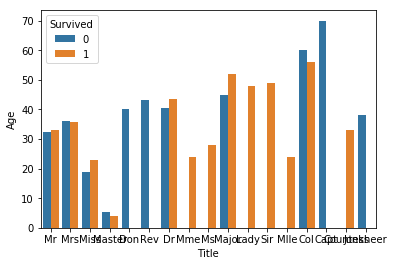

In [248]:
sns.barplot(x= 'Title', y='Age', hue='Survived', data=train_df, ci = None, capsize=.4)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


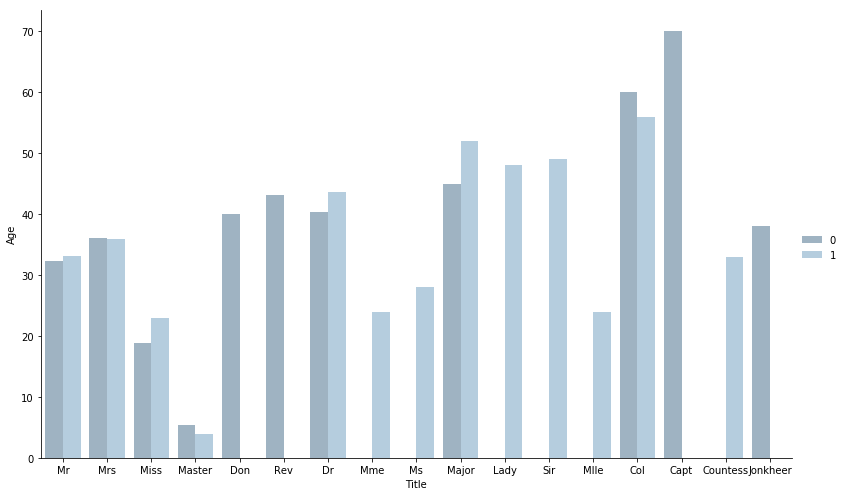

In [249]:
grid = sns.FacetGrid(train_df, size=7, aspect=1.6, palette='deep')
grid.map(sns.barplot,'Title','Age','Survived' ,ci=None, alpha=.5,  palette="Blues_d")
grid.add_legend()

In [250]:
pd.crosstab(train_df.Title, train_df.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
AgeTiltle = pd.crosstab(train_df.Title, train_df.Sex)

In [252]:
AgeTiltle.columns

Index(['female', 'male'], dtype='object', name='Sex')

In [253]:
AgeTiltle[(AgeTiltle['female'] + AgeTiltle['male']) > 10]

Sex,female,male
Title,,
Master,0,40
Miss,182,0
Mr,0,517
Mrs,125,0


In [254]:
AgeTiltle

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

In [256]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [0]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

In [258]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [0]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [260]:
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [261]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [262]:
train_df[train_df.Age.isna() == True].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,0,NaN,0,0,8.4583,Q,1
17,1,2,0,NaN,0,0,13.0000,S,1
19,1,3,1,NaN,0,0,7.2250,C,3
26,0,3,0,NaN,0,0,7.2250,C,1
28,1,3,1,NaN,0,0,7.8792,Q,2


In [0]:
age_dataset = train_df[['Pclass', 'Sex', 'Age']].dropna(subset=['Age']).groupby(['Pclass', 'Sex']).median()

In [264]:
age_dataset

Age
Pclass Sex      
1      0    40.0
       1    35.0
2      0    30.0
       1    28.0
3      0    25.0
       1    21.5

In [265]:
age_dataset.index


MultiIndex(levels=[[1, 2, 3], [0, 1]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['Pclass', 'Sex'])

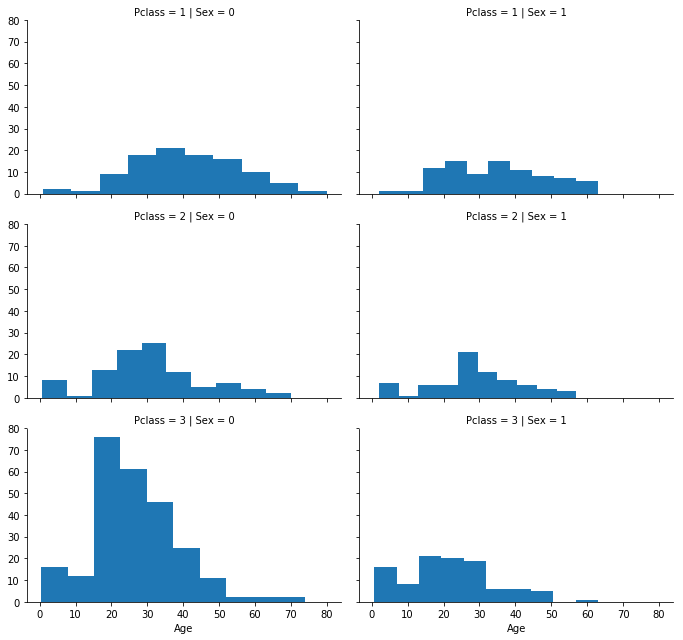

In [266]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age')

In [267]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [268]:
train_df[(train_df['Sex'] == 1) & (train_df['Pclass'] == 3)]['Age'].dropna().median()

21.5

In [269]:
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
      age_guess = guess_df.median()
      guess_ages[i,j] = age_guess
  for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

dataset['Age'] = dataset['Age'].astype(int)

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,25.0,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


In [270]:
 guess_ages

array([[42., 28., 24.],
       [41., 24., 22.]])

In [0]:
check = pd.cut(train_df['Age'], 5, precision=0)

In [272]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5, precision=0)
train_df[['AgeBand','Survived']].groupby('AgeBand', as_index = False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0, 16.0]",0.550000
1,"(16.0, 32.0]",0.336714
2,"(32.0, 48.0]",0.412844
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [273]:
for dataset in combine:
  dataset.loc[dataset['Age']<=16, 'Age'] = 0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.0, 48.0]"


In [0]:
for dataset in combine:
  dataset['Age'] = dataset['Age'].astype(int)

In [275]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [276]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [0]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [278]:
train_df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [279]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize']).agg(('count', 'mean')).sort_values(by=('Survived','mean'), ascending=False).reset_index()

FamilySize Survived          
                count      mean
0          4       29  0.724138
1          3      102  0.578431
2          2      161  0.552795
3          7       12  0.333333
4          1      537  0.303538
5          5       15  0.200000
6          6       22  0.136364
7          8        6  0.000000
8         11        7  0.000000

In [0]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [281]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [282]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [283]:
train_df = train_df.drop(['SibSp','Parch','FamilySize'], axis=1)
test_df = test_df.drop(['SibSp','Parch','FamilySize'], axis=1)  
  
combine = [train_df, test_df]
#train_df.head()
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [284]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [285]:
for dataset in combine:
  dataset['Age*Class'] = dataset['Age']*dataset['Pclass']
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [286]:
for dataset in combine:
  dataset['Age*Class'] = dataset['Age']*dataset['Pclass']
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [0]:
show = train_df[['Age*Class','Survived']].groupby('Age*Class',  as_index=False).mean()

In [288]:
show['Age*Class']

0     0
1     1
2     2
3     3
4     4
5     6
6     8
7     9
8    12
Name: Age*Class, dtype: int64

<BarContainer object of 9 artists>

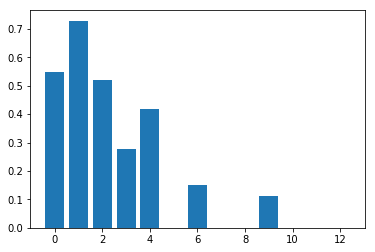

In [289]:
plt.bar(show['Age*Class'], show['Survived'])

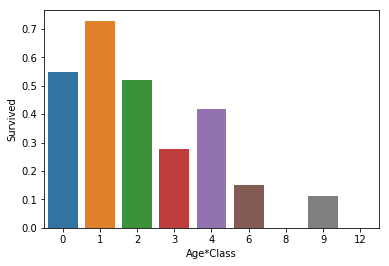

In [290]:
sns.barplot(x= 'Age*Class', y='Survived', data=train_df, ci = None, capsize=.4)

In [291]:
train_df.Embarked.isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [0]:
freq_port=train_df.Embarked.dropna().mode()[0]

In [0]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [294]:
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [295]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
  
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [296]:
test_df['Fare'].dropna().median()


14.4542

In [297]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [298]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [299]:
#train_df['Fare'] = pd.qcut(train_df['Fare'], 4,labels=False)
#train_df.head(10)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [300]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [0]:
X_train = train_df.drop(['Survived'], axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1).copy()

In [302]:
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [303]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [0]:
acc_log = round(logreg.score(X_train, Y_train)*100, 2)

In [305]:
acc_log

81.26

In [306]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [0]:
conf_met= skmetrics.confusion_matrix(Y_train, logreg.predict(X_train))

In [308]:
conf_met

array([[479,  70],
       [ 97, 245]])

In [309]:
logreg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [310]:
logreg.coef_

array([[-1.08495822,  2.20208381, -0.37216789, -0.02257341,  0.28131077,
         0.41386088,  0.26086554, -0.08492866]])

In [311]:
train_df.columns.drop('Survived')

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Class'],
      dtype='object')

In [0]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))

In [313]:
coeff_df

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Class


In [314]:
coeff_df.columns = ['Feature']
coeff_df

,Feature
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Class


In [315]:
pd.Series(logreg.coef_[0])

0   -1.084958
1    2.202084
2   -0.372168
3   -0.022573
4    0.281311
5    0.413861
6    0.260866
7   -0.084929
dtype: float64

In [0]:
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

In [317]:
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.202084
5,Title,0.413861
4,Embarked,0.281311
6,IsAlone,0.260866
3,Fare,-0.022573
7,Age*Class,-0.084929
2,Age,-0.372168
0,Pclass,-1.084958


In [318]:
svc= SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [319]:
svc.score(X_train, Y_train)

0.835016835016835

In [0]:
knn= KNeighborsClassifier(n_neighbors=4)

In [321]:
knn.fit(X_train, Y_train)
Y_pred  = knn.predict(X_test)
knn.score(X_train, Y_train)

0.835016835016835

In [0]:
gaussian = GaussianNB()

In [323]:
gaussian.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gau_pred = gaussian.predict(X_test)

In [325]:
gaussian.score(X_train, Y_train)

0.7687991021324355

In [326]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.05

In [327]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree.score(X_train, Y_train)

0.8664421997755332

In [328]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [329]:
models = pd.DataFrame({'Model': ['Random Forest','Perceptron'],
                       'Score': [acc_random_forest,acc_perceptron]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,86.64
1,Perceptron,72.05


In [0]:
sumbmission = pd.DataFrame({'PassengerId': test_df.PassengerId,
                            'Survived': Y_pred})

In [331]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X_train, Y_train, test_size=0.4, random_state=42)
X_Train.shape,  X_Test.shape, y_Train.shape, y_Test.shape

((534, 8), (357, 8), (534,), (357,))

## Start Grid Search for 5 chosen models: RandomForest, SVC, KNeighbors, GaussianNB, LogisticRegression



In [332]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_Train, y_Train)
train_score = model1.score(X_Train, y_Train)
test_score = model1.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.88202
test score: 0.81513


In [333]:
clf = RandomForestClassifier()
param_grid_values =  {'n_estimators': [10,25,50,100,150], 'criterion': ['gini','entropy'], 'max_depth': [2,3,4,5,6,7,8],
                      'min_samples_leaf':[3,4,5,6]}
grid_s = GridSearchCV(clf, param_grid= param_grid_values,cv=2 )
grid_s.fit(X_Train, y_Train)
train_score = grid_s.score(X_Train, y_Train)
test_score = grid_s.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.85019
test score: 0.78151


In [334]:
model2 = SVC()
model2.fit(X_Train, y_Train)
train_score = model2.score(X_Train, y_Train)
test_score = model2.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.84644
test score: 0.80112


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [335]:
clf = SVC()
param_grid_values =  {'C': [0.001,.009,0.01,.09,1,5,10,25], 'kernel': ['poly','sigmoid','rbf'], 'decision_function_shape': ['ovo','ovr']}
grid_s = GridSearchCV(clf, param_grid= param_grid_values,cv=5 )
grid_s.fit(X_Train, y_Train)
clear_output()
train_score = grid_s.score(X_Train, y_Train)
test_score = grid_s.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.85393
test score: 0.79552


In [336]:
model3 = KNeighborsClassifier(n_neighbors=4)
model3.fit(X_Train, y_Train)
train_score = model3.score(X_Train, y_Train)
test_score = model3.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.84831
test score: 0.79552


In [337]:
clf = KNeighborsClassifier()
param_grid_values =  {'n_neighbors': [3,4,5,6,7,8,10,12], 'weights': ['uniform','distance'], 'algorithm': ['ball_tree','kd_tree','brute']}
grid_s = GridSearchCV(clf, param_grid= param_grid_values,cv=5 )
grid_s.fit(X_Train, y_Train)
clear_output()
train_score = grid_s.score(X_Train, y_Train)
test_score = grid_s.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.88202
test score: 0.80392


0.803921568627451

In [338]:
model4 = GaussianNB()
model4.fit(X_Train, y_Train)
train_score = model4.score(X_Train, y_Train)
test_score = model4.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.79026
test score: 0.76471


In [339]:
clf = GaussianNB()
param_grid_values =  {'var_smoothing': [0.001,0.01,0.1,0.002]}
grid_s = GridSearchCV(clf, param_grid= param_grid_values,cv=5 )
grid_s.fit(X_Train, y_Train)
clear_output()
train_score = grid_s.score(X_Train, y_Train)
test_score = grid_s.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.79026
test score: 0.76471


In [340]:
model5= LogisticRegression()
model5.fit(X_Train, y_Train)
train_score = model5.score(X_Train, y_Train)
test_score = model5.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.82022
test score: 0.79272


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [341]:
clf = LogisticRegression()
param_grid_values =  {'penalty': ['l2'], 'C': [0.001,0.1,0.2,0.5,0.9,100,0.000001],
                      'solver': ['newton-cg','lbfgs','liblinear','sag','sag']}
grid_s = GridSearchCV(clf, param_grid= param_grid_values,cv=5 )
grid_s.fit(X_Train, y_Train)
clear_output()
train_score = grid_s.score(X_Train, y_Train)
test_score = grid_s.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.81273
test score: 0.79272


## Try ensemble to try improve the accuracy

In [342]:
#model1 = RandomForestClassifier(n_estimators=100)
#model2 = SVC()
#model3 = KNeighborsClassifier(n_neighbors=4)
model = VotingClassifier(estimators=[('rf', model1), ('svc', model2), ('knn', model3), ('gau', model4),('log', model5)], voting='hard')
model.fit(X_Train,y_Train)
train_score = model.score(X_Train, y_Train)
test_score = model.score(X_Test, y_Test)
print('train score: '+"{0:.5f}".format(train_score))
print('test score: '+"{0:.5f}".format(test_score))

train score: 0.85393
test score: 0.79552


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##------------------------------------------------------------------

0.7955182072829131

In [343]:
pd.DataFrame({'model1' :model1.predict(X_Test),
              'model2' :model2.predict(X_Test),
              'model3' :model3.predict(X_Test),
              'ensemble model' : model.predict(X_Test),
              'real y' : y_Test}).head(10)

,model1,model2,model3,ensemble model,real y
709,1,0,1,1,1
439,0,0,0,0,0
840,0,0,0,0,0
720,1,1,1,1,1
39,1,1,1,1,1
290,1,1,1,1,1
300,1,1,1,1,1
333,0,0,0,0,0
208,1,1,1,1,1
136,1,1,1,1,1


In [0]:
predict3 = model3.predict(X_Test)
predict_ens = model.predict(X_Test)

In [345]:
y_Test.iloc[0]

1

In [0]:
counter3 = 0
counter_ens = 0
for i in range(0,len(y_Test)):
  if predict3[i] == y_Test.iloc[i]:
    counter3+=1
  if predict_ens[i] == y_Test.iloc[i]:
    counter_ens+=1
    
  

In [347]:
counter3, counter_ens

(284, 284)

In [348]:
X_Train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
570,2,0,3,1,0,1,1,6
787,3,0,0,2,2,4,0,0
74,3,0,1,3,0,1,1,3
113,3,1,1,1,0,2,0,3
635,2,1,1,1,0,2,1,2


In [349]:
X_Train.shape,  X_Test.shape, y_Train.shape, y_Test.shape

((534, 8), (357, 8), (534,), (357,))

In [350]:
model= RandomForestClassifier(n_estimators=40, max_depth=4,random_state=1)
model.fit(X_Train.values, y_Train.values)
model.score(X_Test,y_Test)

0.8095238095238095

In [351]:
model= RandomForestClassifier(n_estimators=40, max_depth=4,random_state=1)
model.fit(X_Train.values, y_Train.values)
model.score(X_Test,y_Test)

0.8095238095238095

In [352]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_Train.values, y_Train.values)
model.score(X_Test,y_Test)

0.8067226890756303

In [353]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1, n_estimators=15, learning_rate=1)
model.fit(X_Train.values, y_Train.values)
model.score(X_Test,y_Test)

0.7955182072829131

In [354]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1, max_depth=4, n_estimators=100)
model.fit(X_Train.values, y_Train.values)
model.score(X_Test,y_Test)

0.803921568627451

In [355]:
import xgboost as xgb
model10=xgb.XGBClassifier(objective="multi:softprob",num_class =5, max_depth=3,random_state=1,learning_rate=0.01)
model10.fit(X_Train, y_Train)
model10.score(X_Test,y_Test)

0.803921568627451

In [0]:
!pip install catboost
clear_output()

In [0]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(depth=4)
model.fit(X_Train, y_Train)
model.score(X_Test,y_Test)
clear_output()